In [101]:
import networkx as nx
import networkx.algorithms.bipartite as bp
from operator import itemgetter, attrgetter
import matplotlib.pyplot as plot
import matplotlib.colors as colors
%matplotlib inline
plot.rcParams['figure.figsize'] = (21, 14)


In [22]:
## get the graph data; imports as a bipartite graph
G = nx.davis_southern_women_graph()

In [70]:
nx.is_connected(G)

True

In [69]:
nx.is_bipartite(G)

True

In [26]:
## this step is unnecessary, just a different way to reference the two node sets
women = G.graph['top']
clubs = G.graph['bottom']

In [24]:
## this is the more common way to do the same; women already are the top nodes, clubs on bottom
top_nodes, bottom_nodes = bipartite.sets(G)

In [25]:
top_nodes

{'Brenda Rogers',
 'Charlotte McDowd',
 'Dorothy Murchison',
 'Eleanor Nye',
 'Evelyn Jefferson',
 'Flora Price',
 'Frances Anderson',
 'Helen Lloyd',
 'Katherina Rogers',
 'Laura Mandeville',
 'Myra Liddel',
 'Nora Fayette',
 'Olivia Carleton',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Sylvia Avondale',
 'Theresa Anderson',
 'Verne Sanderson'}

In [28]:
bottom_nodes

{'E1',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9'}

In [41]:
## all the nodes and their degrees (number of connections)
nx.degree(G)

{'Brenda Rogers': 7,
 'Charlotte McDowd': 4,
 'Dorothy Murchison': 2,
 'E1': 3,
 'E10': 5,
 'E11': 4,
 'E12': 6,
 'E13': 3,
 'E14': 3,
 'E2': 3,
 'E3': 6,
 'E4': 4,
 'E5': 8,
 'E6': 8,
 'E7': 10,
 'E8': 14,
 'E9': 12,
 'Eleanor Nye': 4,
 'Evelyn Jefferson': 8,
 'Flora Price': 2,
 'Frances Anderson': 4,
 'Helen Lloyd': 5,
 'Katherina Rogers': 6,
 'Laura Mandeville': 7,
 'Myra Liddel': 4,
 'Nora Fayette': 8,
 'Olivia Carleton': 2,
 'Pearl Oglethorpe': 3,
 'Ruth DeSand': 4,
 'Sylvia Avondale': 7,
 'Theresa Anderson': 8,
 'Verne Sanderson': 4}

In [53]:
# project bipartite graph onto women nodes
# now the degrees are their connections with other women
# based on participation in the same club events

W = bipartite.projected_graph(G, women)
print ''
print "Friends   Member"
print '---------------------------'
for w in women:
    print '%d        %s' % (W.degree(w),w)


Friends   Member
---------------------------
17        Evelyn Jefferson
15        Laura Mandeville
17        Theresa Anderson
15        Brenda Rogers
11        Charlotte McDowd
15        Frances Anderson
15        Eleanor Nye
16        Pearl Oglethorpe
17        Ruth DeSand
17        Verne Sanderson
16        Myra Liddel
16        Katherina Rogers
17        Sylvia Avondale
17        Nora Fayette
17        Helen Lloyd
16        Dorothy Murchison
12        Olivia Carleton
12        Flora Price


In [58]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts

W = bipartite.weighted_projected_graph(G, women)
print ''
print "Friend Mtgs.  Member"
print '-------------------------------'
for w in women:
    print('%d            %s' % (W.degree(w,weight='weight'),w))


Friend Mtgs.  Member
-------------------------------
50            Evelyn Jefferson
45            Laura Mandeville
57            Theresa Anderson
46            Brenda Rogers
24            Charlotte McDowd
32            Frances Anderson
36            Eleanor Nye
31            Pearl Oglethorpe
40            Ruth DeSand
38            Verne Sanderson
33            Myra Liddel
37            Katherina Rogers
46            Sylvia Avondale
43            Nora Fayette
34            Helen Lloyd
24            Dorothy Murchison
14            Olivia Carleton
14            Flora Price


In [93]:
## women sorted by clustering coefficient

c_coefs = bp.clustering(G, women)
sorted(zip(c_coefs.values(), c_coefs.keys()), reverse=True)

[(0.3718188674071027, 'Theresa Anderson'),
 (0.36491249491249483, 'Brenda Rogers'),
 (0.36435574229691875, 'Ruth DeSand'),
 (0.3603174603174603, 'Eleanor Nye'),
 (0.3518172568172568, 'Laura Mandeville'),
 (0.3488328664799254, 'Verne Sanderson'),
 (0.3323412698412699, 'Pearl Oglethorpe'),
 (0.32440476190476186, 'Myra Liddel'),
 (0.322751921281333, 'Sylvia Avondale'),
 (0.3179433311786252, 'Evelyn Jefferson'),
 (0.31481721981721983, 'Frances Anderson'),
 (0.30500992063492066, 'Dorothy Murchison'),
 (0.2974950396825397, 'Katherina Rogers'),
 (0.29441164895710353, 'Charlotte McDowd'),
 (0.2616989219930397, 'Helen Lloyd'),
 (0.26057667822373703, 'Nora Fayette'),
 (0.2575066137566138, 'Flora Price'),
 (0.25750661375661377, 'Olivia Carleton')]

In [91]:
## try it with the events
c_events = bp.clustering(G, bottom_nodes)
sorted(zip(c_events.values(), c_events.keys()), reverse=True)

[(0.47048611111111116, 'E3'),
 (0.4678921568627451, 'E5'),
 (0.4033424908424909, 'E10'),
 (0.40144230769230776, 'E12'),
 (0.3664772727272727, 'E14'),
 (0.3664772727272727, 'E13'),
 (0.3644480519480519, 'E4'),
 (0.3374937562437562, 'E2'),
 (0.32719155844155845, 'E1'),
 (0.2961646196940315, 'E8'),
 (0.2916412647181878, 'E6'),
 (0.2893897203851955, 'E7'),
 (0.24355452240067624, 'E9'),
 (0.1770270171005465, 'E11')]

In [97]:
## compare clustering coefficient for projected graph
p_clust = nx.clustering(W, women)
sorted(zip(p_clust.values(), p_clust.keys()), reverse=True)

[(1.0, 'Olivia Carleton'),
 (1.0, 'Flora Price'),
 (1.0, 'Charlotte McDowd'),
 (0.9619047619047619, 'Laura Mandeville'),
 (0.9619047619047619, 'Frances Anderson'),
 (0.9619047619047619, 'Eleanor Nye'),
 (0.9619047619047619, 'Brenda Rogers'),
 (0.9333333333333333, 'Pearl Oglethorpe'),
 (0.9333333333333333, 'Myra Liddel'),
 (0.9333333333333333, 'Katherina Rogers'),
 (0.9333333333333333, 'Dorothy Murchison'),
 (0.8970588235294118, 'Verne Sanderson'),
 (0.8970588235294118, 'Theresa Anderson'),
 (0.8970588235294118, 'Sylvia Avondale'),
 (0.8970588235294118, 'Ruth DeSand'),
 (0.8970588235294118, 'Nora Fayette'),
 (0.8970588235294118, 'Helen Lloyd'),
 (0.8970588235294118, 'Evelyn Jefferson')]

In [128]:
W.degree().values()

[17, 16, 12, 16, 17, 17, 17, 12, 15, 15, 15, 16, 17, 15, 17, 11, 16, 17]

In [137]:
W.degree()

{'Brenda Rogers': 15,
 'Charlotte McDowd': 11,
 'Dorothy Murchison': 16,
 'Eleanor Nye': 15,
 'Evelyn Jefferson': 17,
 'Flora Price': 12,
 'Frances Anderson': 15,
 'Helen Lloyd': 17,
 'Katherina Rogers': 16,
 'Laura Mandeville': 15,
 'Myra Liddel': 16,
 'Nora Fayette': 17,
 'Olivia Carleton': 12,
 'Pearl Oglethorpe': 16,
 'Ruth DeSand': 17,
 'Sylvia Avondale': 17,
 'Theresa Anderson': 17,
 'Verne Sanderson': 17}

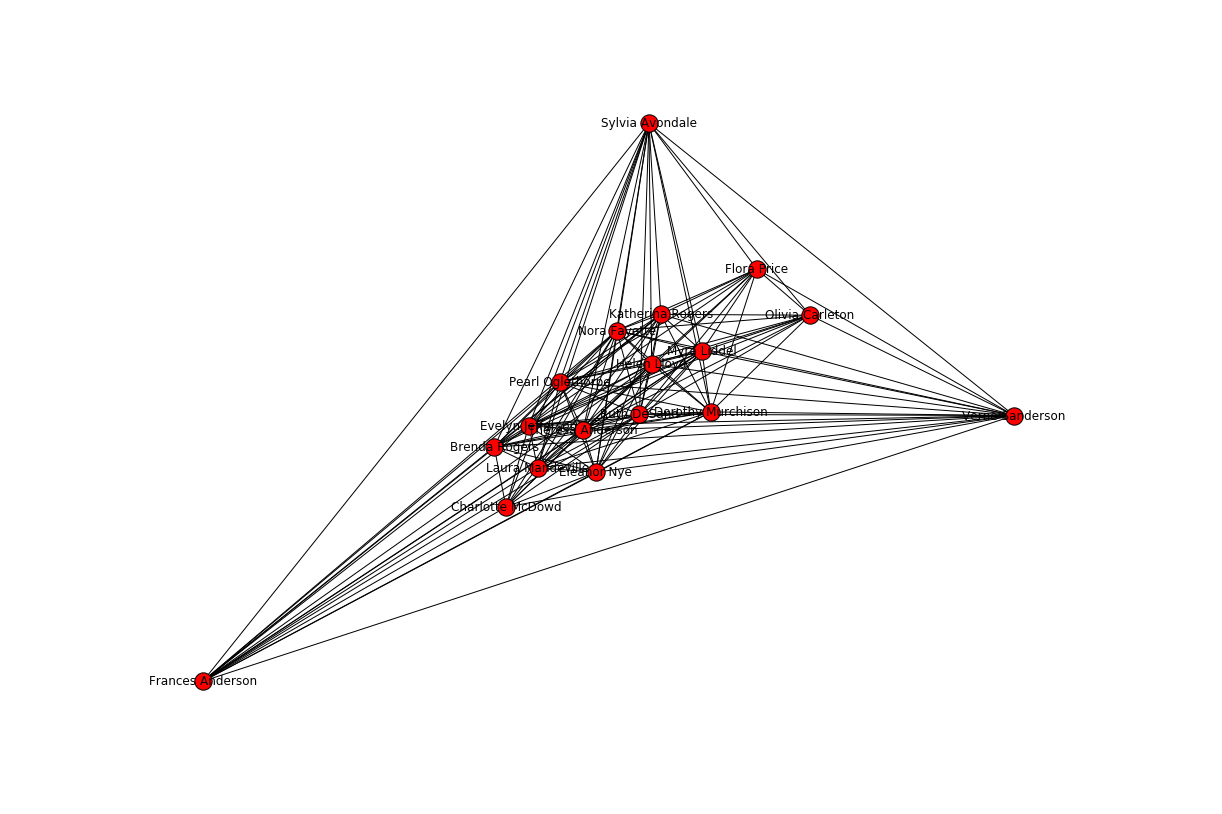

In [138]:
## plot the projected network
## node_weights = W.degree().values()

plot.axis('off')
nx.draw(W, with_labels=True)
plot.show()

In [147]:
## look at the clubs

C = bipartite.weighted_projected_graph(G, bottom_nodes)
print ''
print "Attendees  Club"
print '---------------'
for c in clubs:
    print('%d         %s' % (C.degree(c, weight='weight'),c))


Attendees  Club
---------------
19         E1
20         E2
32         E3
23         E4
38         E5
41         E6
48         E7
59         E8
46         E9
25         E10
13         E11
28         E12
18         E13
18         E14


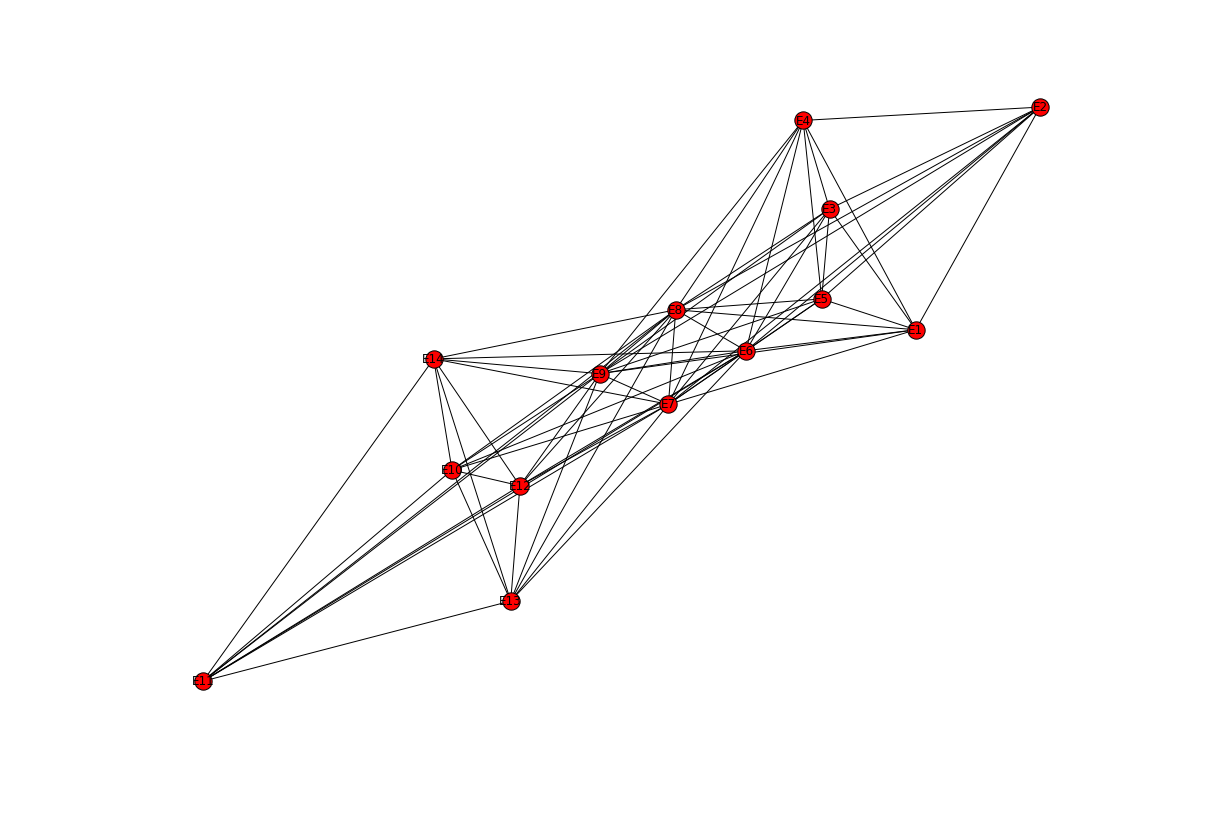

In [148]:
## plot the projected network
## node_weights = W.degree().values()

plot.axis('off')
nx.draw(C, with_labels=True)
plot.show()